In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv("C:/Users/SAMHITA/OneDrive/Desktop/SEM-2/Indrani Mam/Boston.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [5]:
df.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [751]:
df.shape

(506, 14)

In [8]:
df.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

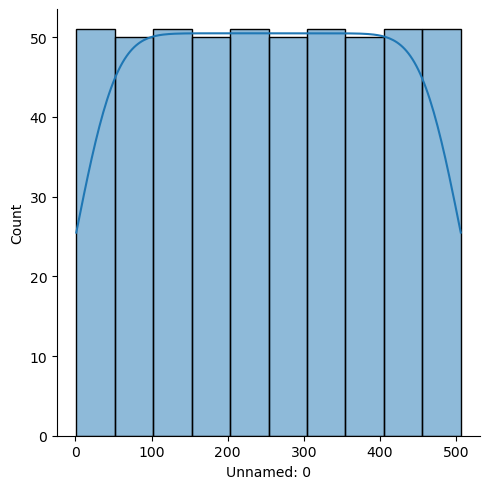

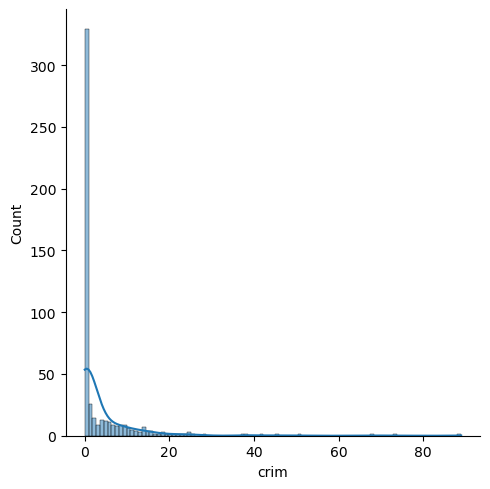

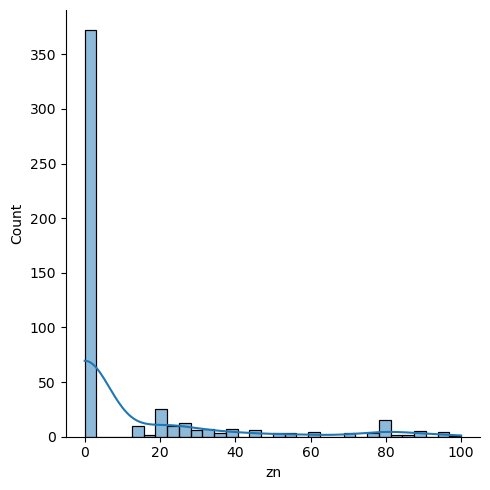

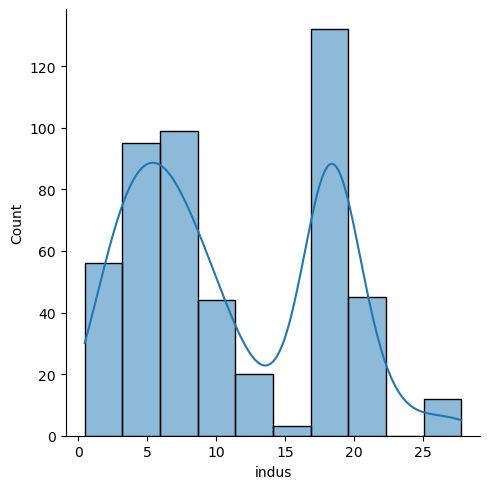

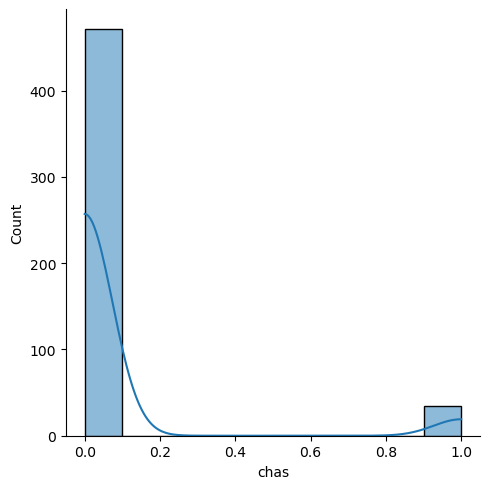

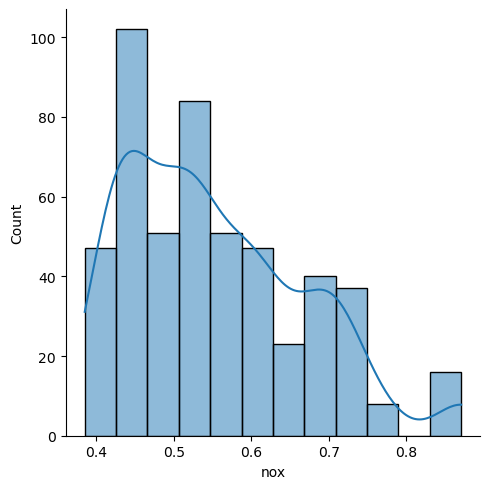

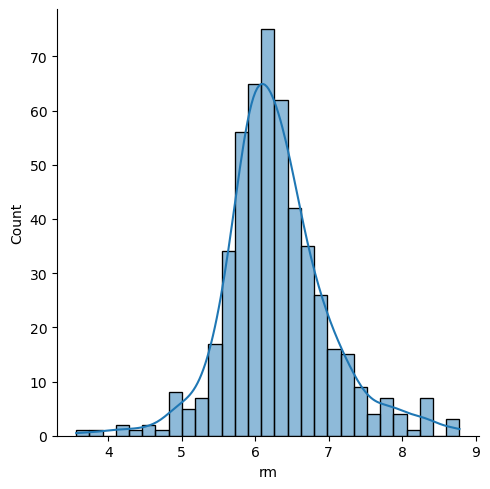

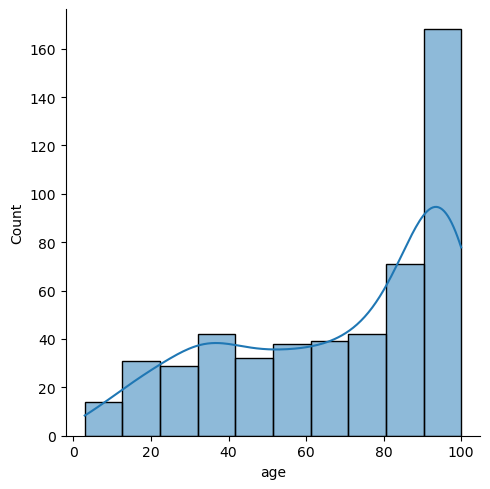

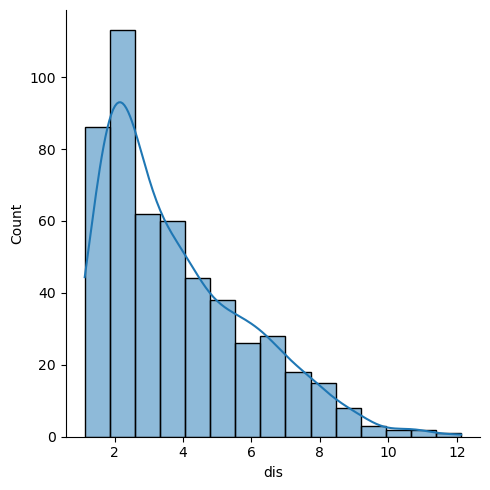

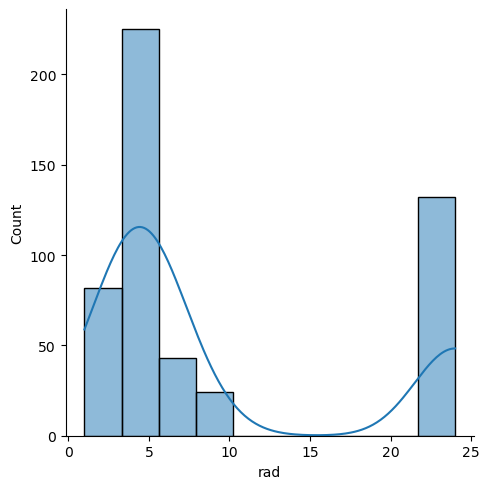

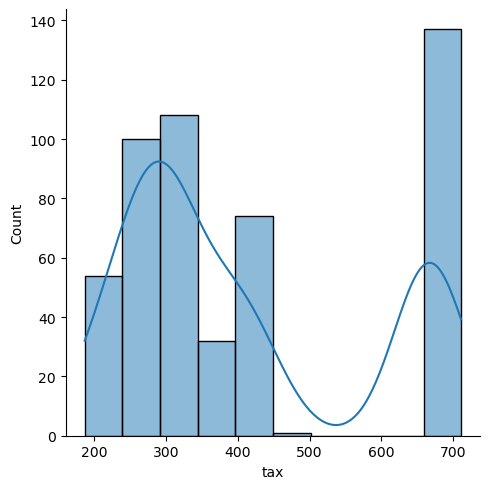

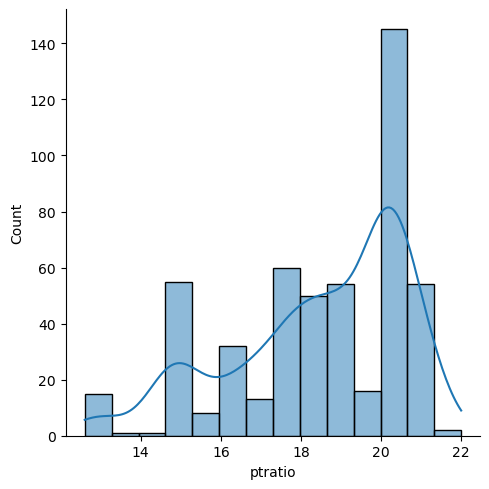

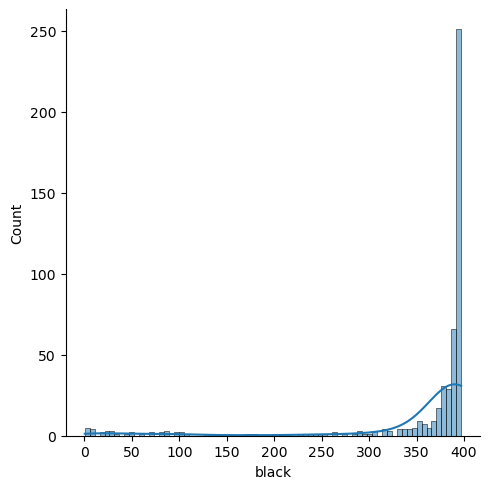

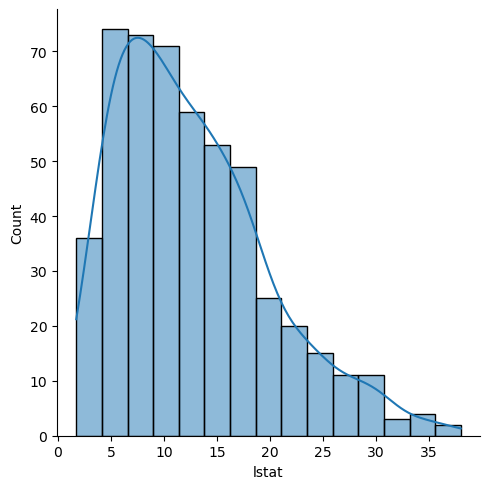

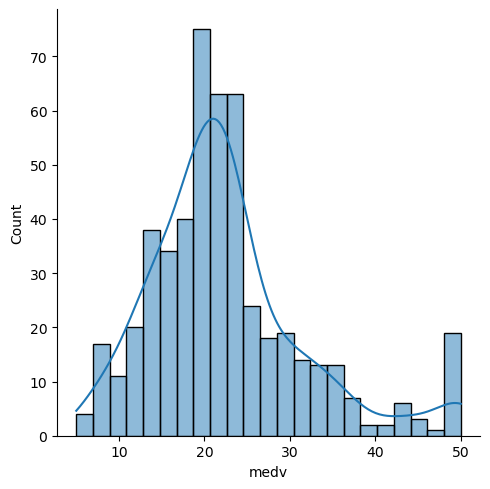

In [9]:
for i in df.columns:
    sns.displot(df[i],kde=True)

crim,zn,chas,nox,dis,lstat,medv are right skewed ,age,black are left skewed

In [10]:
X = df.iloc[:,1:14]
y = df.iloc[:,-1]

In [11]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100)

In [12]:
df.drop(['indus'],axis=1,inplace=True)

In [13]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
# Square root transformation
X_transformed = np.sqrt(X)

In [15]:
print("Original data: ", X)

Original data:          crim    zn  indus  chas    nox     rm   age     dis  rad  tax   
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  \
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392

In [16]:
print("Transformed data: ", X_transformed)

Transformed data:           crim        zn     indus  chas       nox        rm       age   
0    0.079498  4.242641  1.519868   0.0  0.733485  2.564176  8.074652  \
1    0.165257  0.000000  2.658947   0.0  0.684836  2.533969  8.882567   
2    0.165197  0.000000  2.658947   0.0  0.684836  2.680485  7.816649   
3    0.179917  0.000000  1.476482   0.0  0.676757  2.645373  6.767570   
4    0.262774  0.000000  1.476482   0.0  0.676757  2.673387  7.362065   
..        ...       ...       ...   ...       ...       ...       ...   
501  0.250260  0.000000  3.453983   0.0  0.756968  2.567684  8.312641   
502  0.212767  0.000000  3.453983   0.0  0.756968  2.473863  8.757854   
503  0.246495  0.000000  3.453983   0.0  0.756968  2.641212  9.539392   
504  0.331044  0.000000  3.453983   0.0  0.756968  2.606530  9.449868   
505  0.217738  0.000000  3.453983   0.0  0.756968  2.455606  8.988882   

          dis       rad        tax   ptratio      black     lstat  
0    2.022375  1.000000  17.204651  

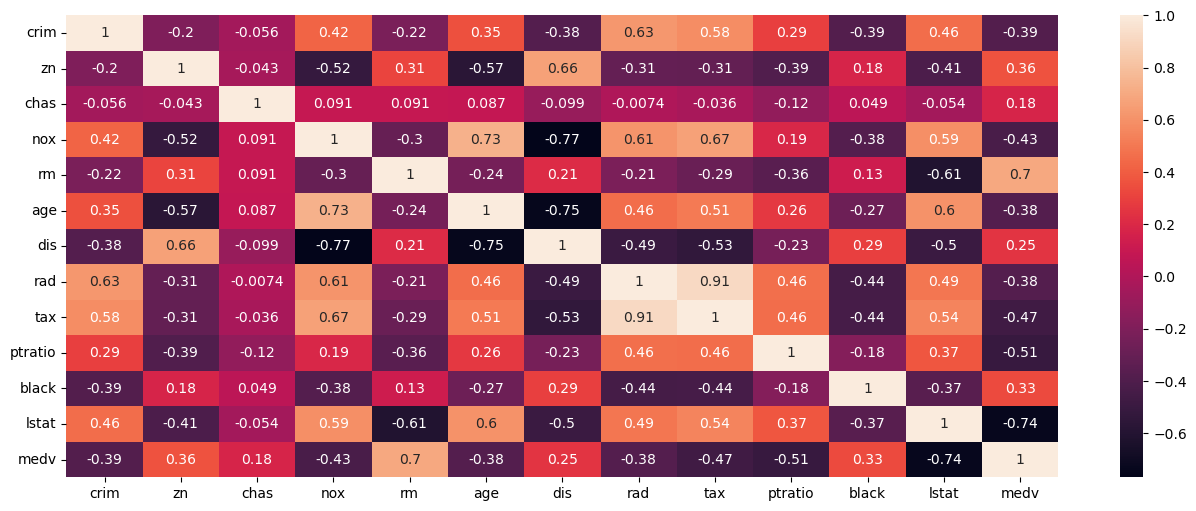

In [17]:
plt.figure(figsize=(16, 6))
df.corr()
heatmap = sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

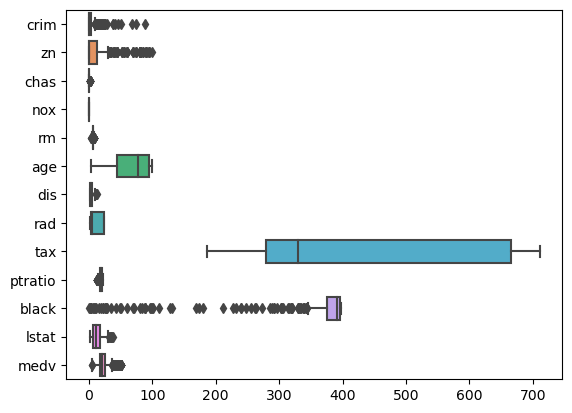

In [18]:
sns.boxplot(data=df,orient='h')

C:\Users\SAMHITA\AppData\Local\Temp\ipykernel_45756\3103469934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rm'])


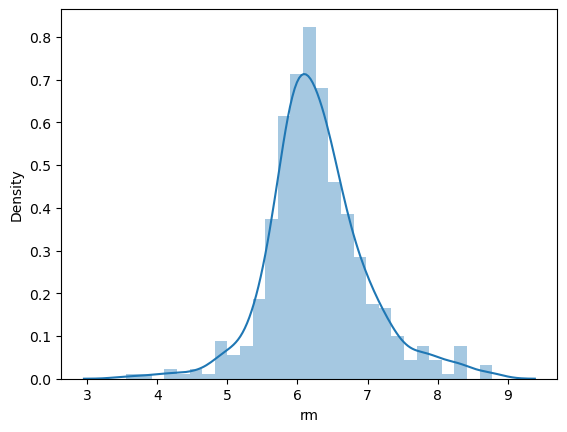

In [41]:
import seaborn as sns
sns.distplot(df['rm'])
plt.show()

In [42]:
# Apply log transformation on the target  column
df['log_medv'] = np.log(df['medv'])

In [43]:
df['log_medv'].skew()

-0.6757469341790961

C:\Users\SAMHITA\AppData\Local\Temp\ipykernel_45756\503670048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_medv'])


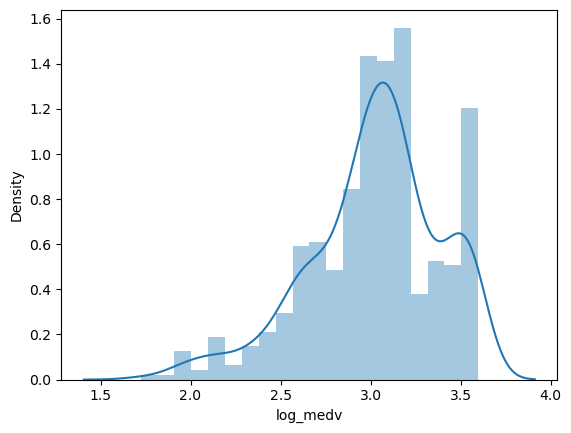

In [44]:
sns.distplot(df['log_medv'])
plt.show()

In [108]:
y_new=np.log(y)

In [525]:
# outlier detection

for i in df.columns:
    q1=np.quantile(df[i],0.25)
    q3=np.quantile(df[i],0.75)
    iqr=q3-q1
    ub=q3+(1.5*iqr)
    lb=q1-(1.5*iqr)

In [526]:
outliers=df[(df[i]>ub)|(df[i]<lb)]

In [527]:
df[i]=np.where(df[i]>ub,np.quantile(df[i],.9),df[i])

In [528]:
df[i]=np.where(df[i]<lb,np.quantile(df[i],.1),df[i])

In [529]:
outliers

,crim,zn,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,log_medv


In [530]:
ub

3.795170126291528

In [531]:
lb

2.2583853224959887

In [532]:
df['crim'].max()

88.9762

<AxesSubplot:>

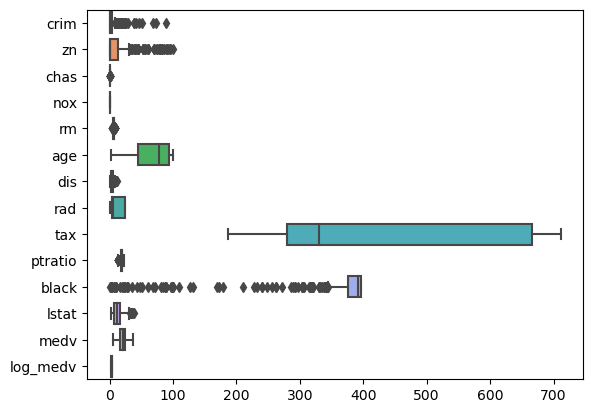

In [533]:
sns.boxplot(data=df,orient='h')

In [535]:
# train test split based on the logmedv(target variable)
x_tr,x_test,y_tr,y_test=train_test_split(X_transformed,y_new,test_size=.2,random_state=100)    # here we do train test split after log-transformation


LINEAR REGRESSION MODEL

In [536]:
# fit a linear regression model 
model_log=LinearRegression().fit(x_tr,y_tr)
Y_pred=model_log.predict(x_tr)

In [537]:
logreg_resid=y_tr-Y_pred

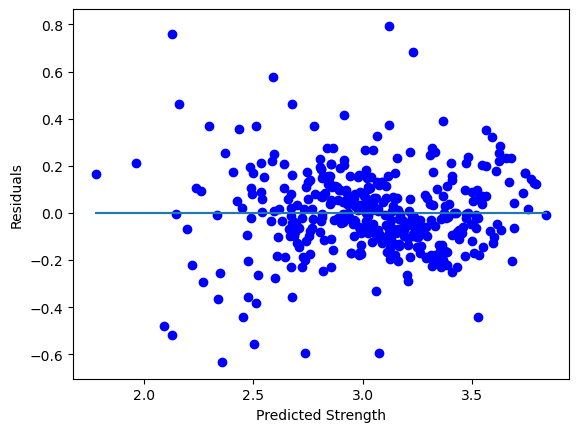

In [538]:
plt.plot (Y_pred,logreg_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (Y_pred, 0*Y_pred)

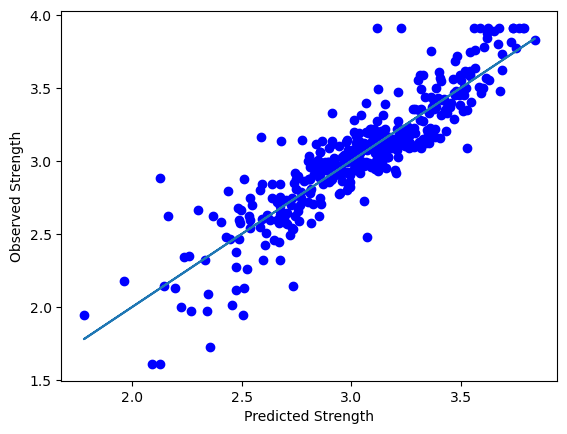

In [539]:
# observed label vs predicted
plt.plot (Y_pred, y_tr, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (Y_pred, Y_pred)

In [540]:
log_fitted=model_log.predict(x_tr)

In [541]:
p_log=model_log.predict(x_test)
p_actual=np.exp(p_log)               # here np.exp is the inverse of log-transformation (exponential)

In [542]:
r2_score(y_tr,log_fitted)          # training accuracy

0.8009566350236277

In [543]:
r2_score(y_test,p_log)            # testing accuracy 

0.8028307582615992

In [553]:
## random forest regressor

In [630]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,random_state=90,max_depth=2,min_samples_leaf=3, min_samples_split=3) 

In [631]:
model.fit(x_tr,y_tr)

RandomForestRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=10, random_state=90)

In [632]:
Y_pred=model.predict(x_tr)

In [633]:
rf_resid=y_tr-Y_pred

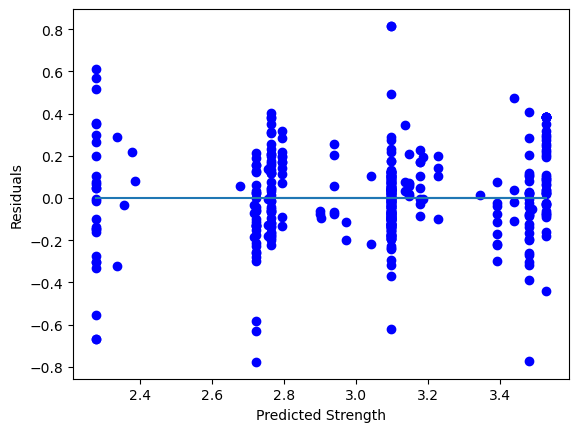

In [634]:
plt.plot (Y_pred, rf_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (Y_pred, 0*Y_pred)

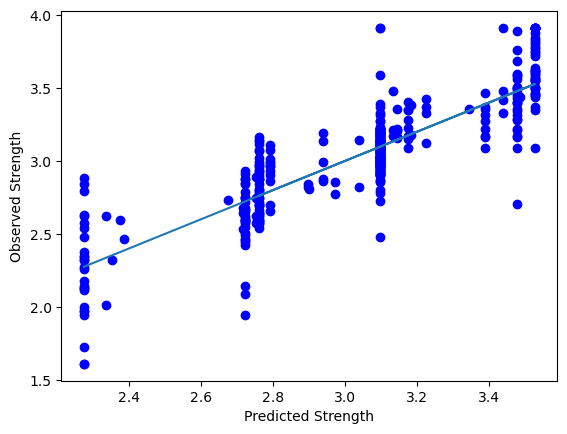

In [635]:
# observed label vs predicted
plt.plot (Y_pred, y_tr, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (Y_pred, Y_pred)

In [636]:
Y_pred_tr1=model.predict(x_tr)

In [637]:
Y_pred_test1=model.predict(x_test)

In [638]:
r2_score(y_tr,Y_pred_tr1)

0.7474701679275166

In [640]:
r2_score(y_test,Y_pred_test1)

0.6408482784520904

In [641]:
## it is overfitting

In [642]:
## XGB tree regressor

In [643]:
import xgboost as xgb

In [725]:
# Create XGBoostRegressor model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=35, max_depth=2, max_leaves=2,learning_rate=0.2)

In [726]:
# Fit model to training data
xgb_regressor.fit(x_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=35, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [727]:
xgb_pred = xgb_regressor.predict (x_tr)
xgb_resid = y_tr-xgb_pred

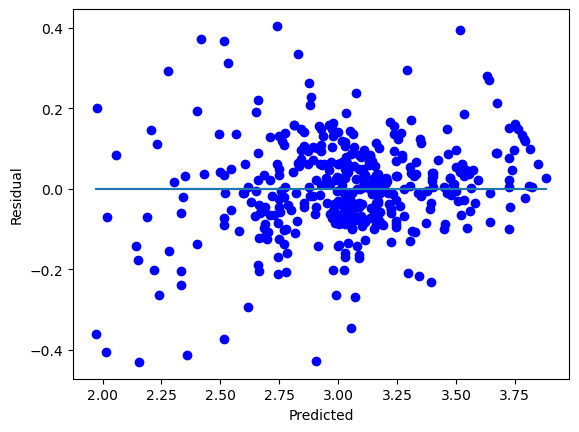

In [728]:
plt.plot (xgb_pred,xgb_resid, 'bo')
plt.ylabel ("Residual")
plt.xlabel ("Predicted")
plt.plot (xgb_pred, 0*xgb_pred)
plt.show()

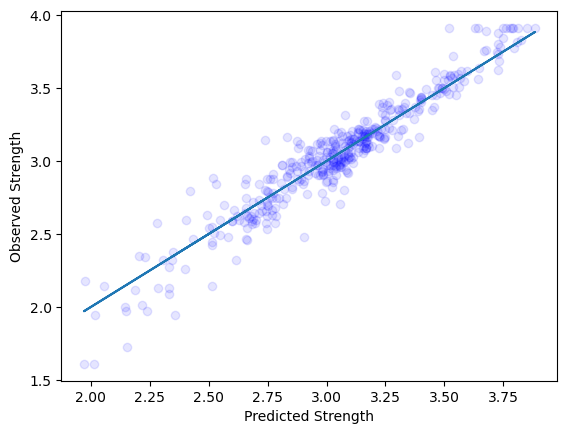

In [729]:
# Observed vs predicted
plt.plot (xgb_pred,y_tr, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (xgb_pred,xgb_pred)

In [730]:
Y_pred_tr2=xgb_regressor.predict(x_tr)

In [731]:
Y_pred_test2=xgb_regressor.predict(x_test)

In [732]:
r2_score(y_tr,Y_pred_tr2)

0.9106388849344244

In [733]:
r2_score(y_test,Y_pred_test2)

0.8094124511181058

In [734]:
## this model is overfitting

In [735]:
##  gradient boosting regressor

In [736]:
from sklearn.ensemble import GradientBoostingRegressor

In [737]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=23, learning_rate=0.2, max_depth=2,min_samples_split=3,min_samples_leaf=3, random_state=0, loss='ls')

In [738]:
# Fit the model to the training data
gbr.fit(x_tr, y_tr)

C:\ANACONDA\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, loss='ls', max_depth=2,
                          min_samples_leaf=3, min_samples_split=3,
                          n_estimators=23, random_state=0)

In [739]:
gbr_pred = gbr.predict (x_tr)
gbr_resid = y_tr-gbr_pred

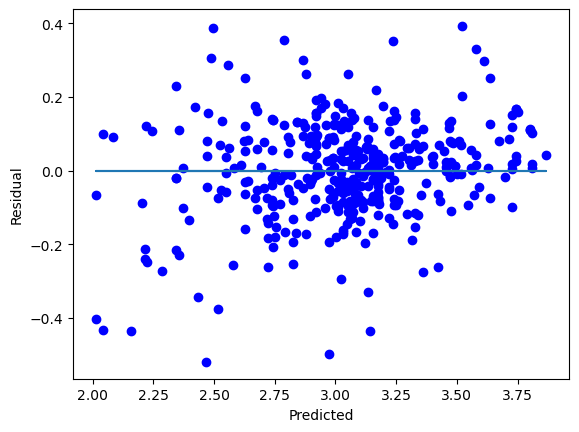

In [740]:
plt.plot (gbr_pred,gbr_resid, 'bo')
plt.ylabel ("Residual")
plt.xlabel ("Predicted")
plt.plot (gbr_pred, 0*gbr_pred)
plt.show()

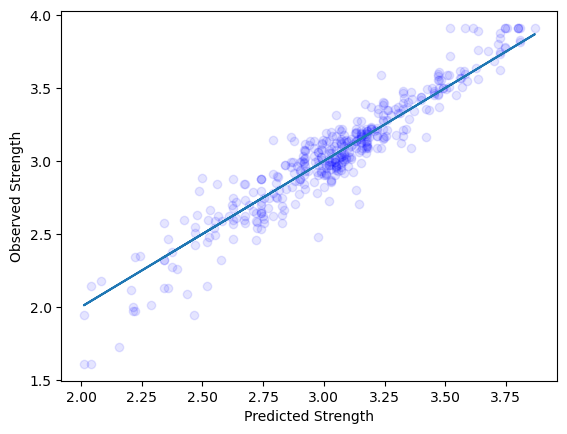

In [741]:
# Observed vs predicted
plt.plot (gbr_pred,y_tr, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (gbr_pred,gbr_pred)

In [742]:
Y_pred_tr3=gbr.predict(x_tr)

In [743]:
Y_pred_test3=gbr.predict(x_test)

In [744]:
r2_score(y_tr,Y_pred_tr3)

0.8954228985802847

In [745]:
r2_score(y_test,Y_pred_test3)

0.8196467062120594

In [746]:
results={'models':['Linear Regression','Random Forest Regressor','XGB Boost Regressor','Gradient Boost Regressor'],'R2-score(training)':[80,75,91,89],'R2-score(testing)':[80,64,81,82]}

In [747]:
results

{'models': ['Linear Regression',
  'Random Forest Regressor',
  'XGB Boost Regressor',
  'Gradient Boost Regressor'],
 'R2-score(training)': [80, 75, 91, 89],
 'R2-score(testing)': [80, 64, 81, 82]}

In [748]:
results_df=pd.DataFrame(results)

In [749]:
results_df

,models,R2-score(training),R2-score(testing)
0,Linear Regression,80,80
1,Random Forest Regressor,75,64
2,XGB Boost Regressor,91,81
3,Gradient Boost Regressor,89,82


In [89]:
## amongst all Linear regression  performed well.